# Ventral Specialization
Exploratory analysis to determine whether the circuitry of a group of ventral cartridges are divergent from circuits corresponding to the rest of the eye

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression

from vis.hex_lattice import hexplot
from vis.colour_palettes import subtype_cm
from vis.fig_tools import linear_cmap

In [3]:
tp = '200218'
data_path = f"~/Data/{tp}_lamina/{tp}"
cx = pd.read_pickle(data_path + "_cxdf.pickle")
links = pd.read_pickle(data_path + "_linkdf.pickle")

subtypes = np.unique([*cx['pre_type'], *cx['post_type']])
ommatidia = np.unique(cx['om']).astype(str)
all_ctypes = [p for p in itertools.product(subtypes, subtypes)]  
all_ctype_labels = [f"{pre}->{post}" for pre, post in all_ctypes]

In [4]:
# Adjacency matrix style pivot table
adj_mn = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type')
adj_var = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type', aggfunc=np.nanvar)
display(f"Mean adjacency matrix across {len(ommatidia)} circuits")
display(adj_mn.astype(int))

adj_mats = dict.fromkeys(ommatidia)  # For each ommatidium
for o in ommatidia:
    adj_mats[o] = pd.pivot_table(cx.loc[cx['om'] == o], values='n_connect', index='pre_type', columns='post_type')

'Mean adjacency matrix across 29 circuits'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0,0,0,0,0,0,0,0,0,0,0,0
LMC_2,21,4,13,13,0,0,1,0,1,4,2,3
LMC_3,0,0,0,0,0,0,0,0,0,0,0,0
LMC_4,0,0,0,0,0,0,0,0,0,0,0,0
LMC_N,3,1,3,0,0,0,0,0,0,0,0,0
R1R4,35,42,19,4,1,0,5,1,0,2,0,12
R2R5,35,53,37,13,0,0,2,0,0,12,1,32
R3R6,33,41,20,4,1,0,4,0,0,2,0,10
R7,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_lamina = pd.DataFrame(index=ommatidia, columns=all_ctype_labels).astype('Int64')

for om, row in df_lamina.iterrows():
    for c in all_ctype_labels:
        pre_t, post_t = c.split('->')
        # Cartridges on the posterior edge lack L4, so their counts for these connections are NaNed 
        if om in ['B0', 'E4', 'E5', 'E6', 'E7', 'D2', 'C1'] and post_t == 'LMC_4':
            df_lamina.loc[om, c] = None
        else:
            df_lamina.loc[om, c] = sum((links.pre_om == om) & (links.post_om == om) & 
                                       (links.pre_type == pre_t) & (links.post_type == post_t))

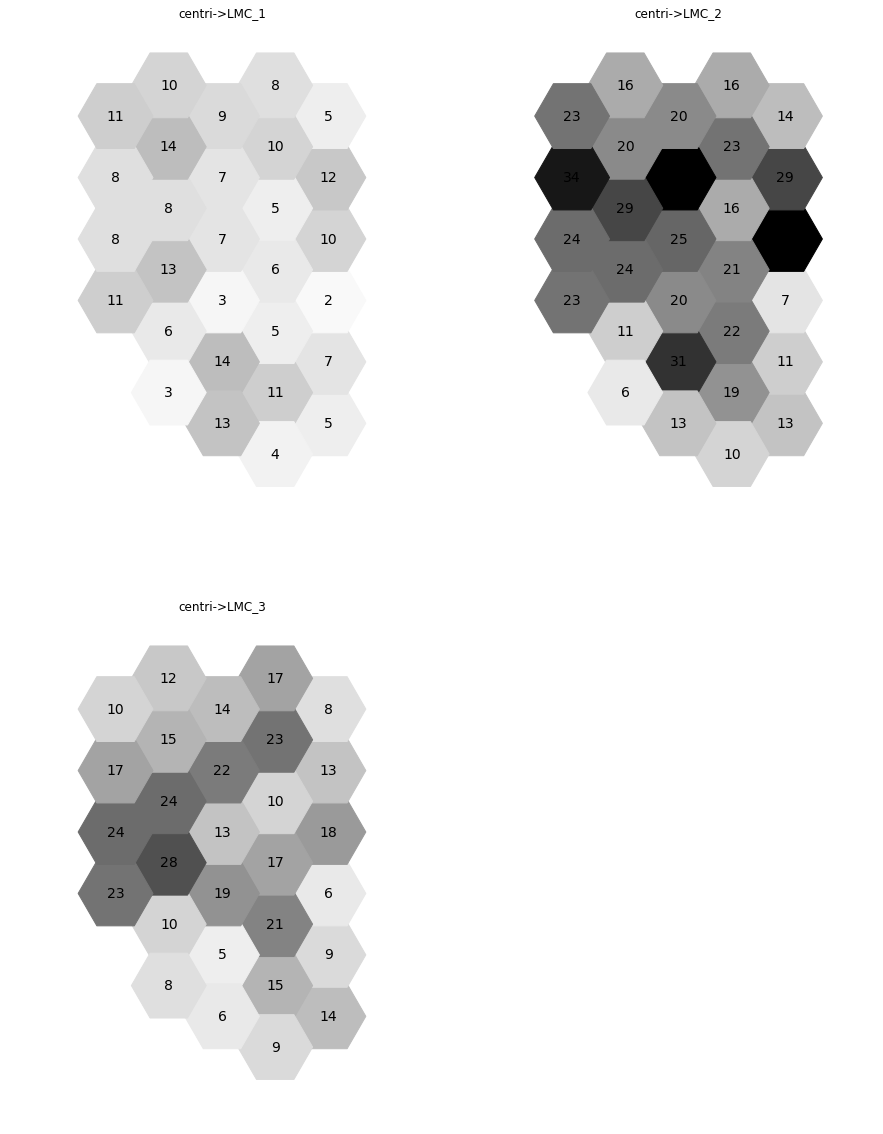

In [6]:
fig, ax = plt.subplots(2, 2, figsize=[15, 20])
ax = ax.flatten()

max_val = df_lamina.filter(regex='^centri->LMC').max().max()
def ucm(val, max_val, c):
    cm = plt.cm.get_cmap(c)
    return cm(val/max_val)

counts = df_lamina.loc[:, 'centri->LMC_1']
node_data = {k: {'colour': ucm(v, max_val, 'Greys'),
                'label': str(v)} for k, v in counts.items()}
hexplot(node_data=node_data, ax=ax[0])
ax[0].set_title("centri->LMC_1")

counts = df_lamina.loc[:, 'centri->LMC_2']
node_data = {k: {'colour': ucm(v, max_val, 'Greys'),
                'label': str(v)} for k, v in counts.items()}
hexplot(node_data=node_data, ax=ax[1])
ax[1].set_title("centri->LMC_2")

counts = df_lamina.loc[:, 'centri->LMC_3']
node_data = {k: {'colour': ucm(v, max_val, 'Greys'),
                'label': str(v)} for k, v in counts.items()}
hexplot(node_data=node_data, ax=ax[2])
ax[2].set_title("centri->LMC_3")

ax[3].axis('off')
plt.show()

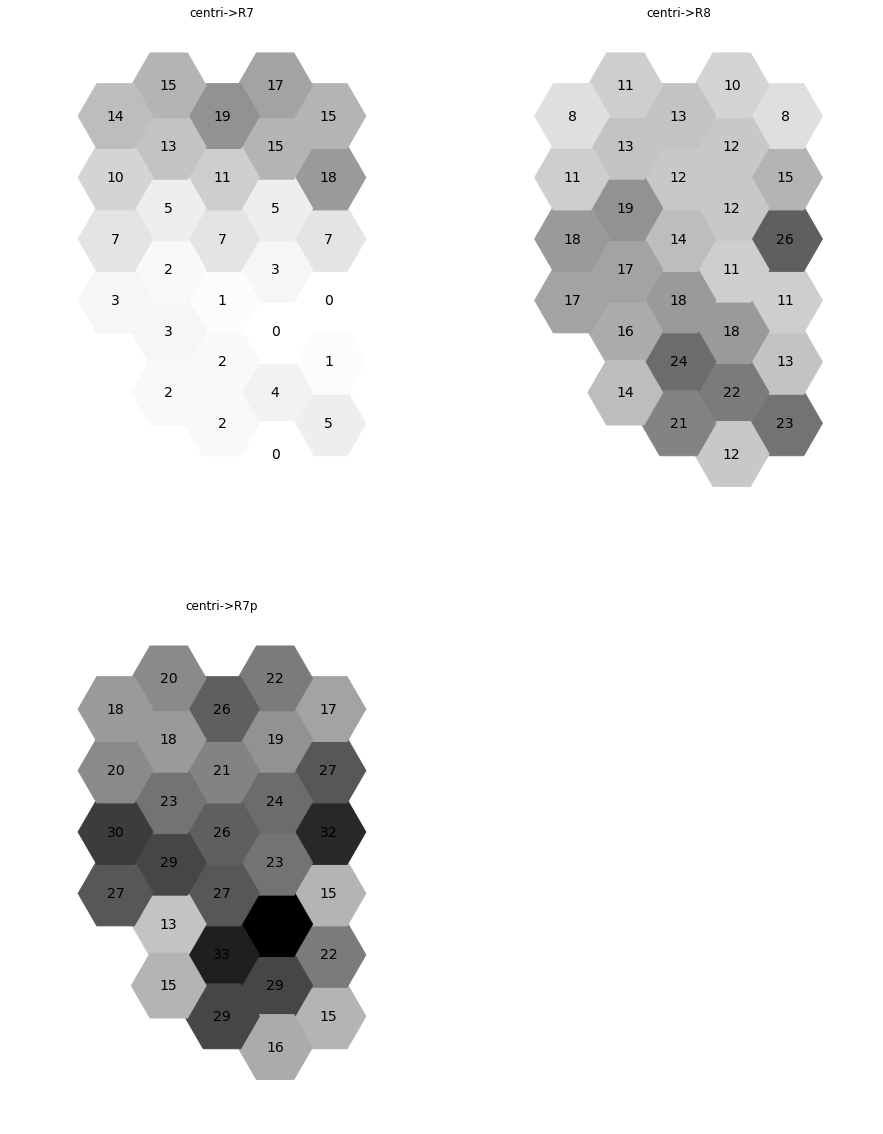

In [7]:
fig, ax = plt.subplots(2, 2, figsize=[15, 20])
ax = ax.flatten()

max_val = df_lamina.filter(regex='^centri->R\d{1,2}').max().max()
def ucm(val, max_val, c):
    cm = plt.cm.get_cmap(c)
    return cm(val/max_val)

counts = df_lamina.loc[:, 'centri->R7']
node_data = {k: {'colour': ucm(v, max_val, 'Greys'),
                'label': str(v)} for k, v in counts.items()}
hexplot(node_data=node_data, ax=ax[0])
ax[0].set_title("centri->R7")

counts = df_lamina.loc[:, 'centri->R8']
node_data = {k: {'colour': ucm(v, max_val, 'Greys'),
                'label': str(v)} for k, v in counts.items()}
hexplot(node_data=node_data, ax=ax[1])
ax[1].set_title("centri->R8")

counts = df_lamina.loc[:, 'centri->R7p']
node_data = {k: {'colour': ucm(v, max_val, 'Greys'),
                'label': str(v)} for k, v in counts.items()}
hexplot(node_data=node_data, ax=ax[2])
ax[2].set_title("centri->R7p")

ax[3].axis('off')
plt.show()

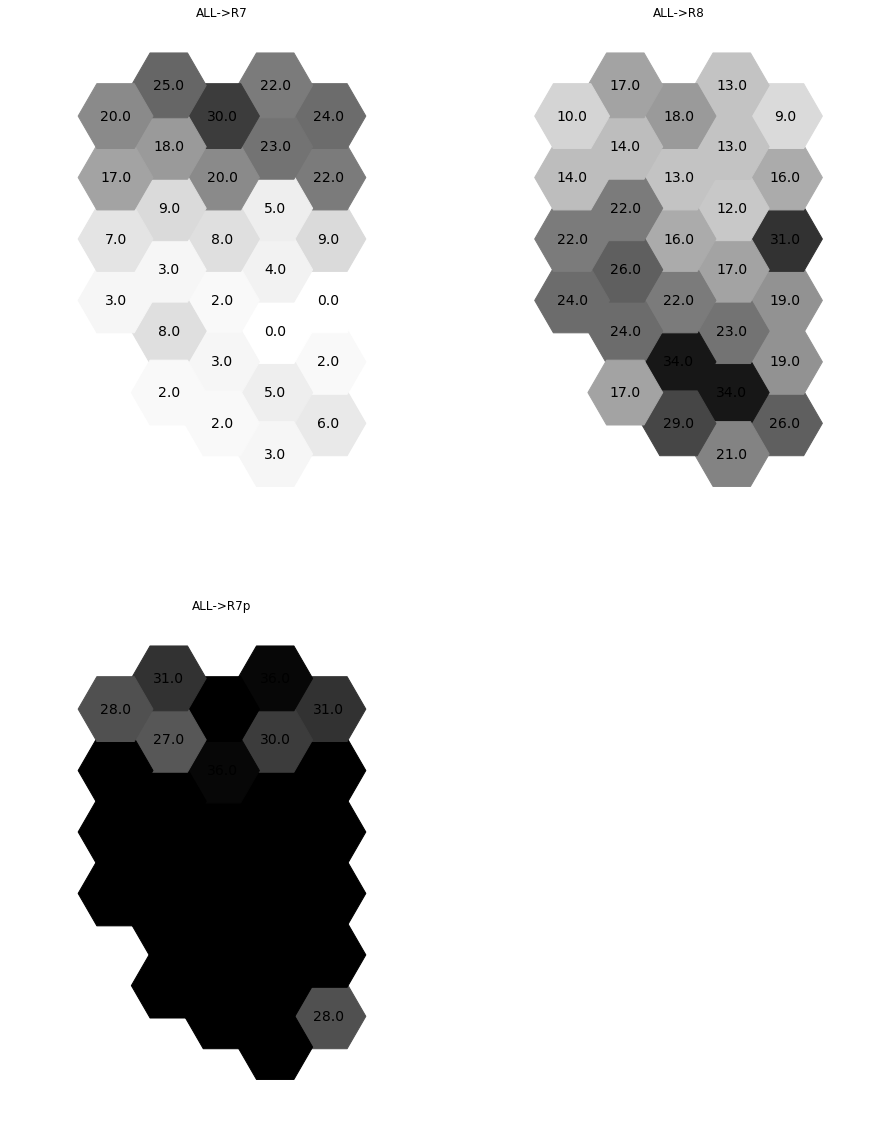

In [8]:
fig, ax = plt.subplots(2, 2, figsize=[15, 20])
ax = ax.flatten()

max_val = df_lamina.filter(regex='->R7p$').max().max()
def ucm(val, max_val, c='Greys'):
    cm = plt.cm.get_cmap(c)
    return cm(float(val)/float(max_val))

counts = df_lamina.filter(regex='->R7$').sum(axis=1)
node_data = {k: {'colour': ucm(v, max_val, 'Greys'),
                'label': str(v)} for k, v in counts.items()}
hexplot(node_data=node_data, ax=ax[0])
ax[0].set_title("ALL->R7")

counts = df_lamina.filter(regex='->R8$').sum(axis=1)
node_data = {k: {'colour': ucm(v, max_val, 'Greys'),
                'label': str(v)} for k, v in counts.items()}
hexplot(node_data=node_data, ax=ax[1])
ax[1].set_title("ALL->R8")

counts = df_lamina.filter(regex='->R7p$').sum(axis=1)
node_data = {k: {'colour': ucm(v, max_val, 'Greys'),
                'label': str(v)} for k, v in counts.items()}
hexplot(node_data=node_data, ax=ax[2])
ax[2].set_title("ALL->R7p")

ax[3].axis('off')
plt.show()

Text(0.5,1,'pR v cR')

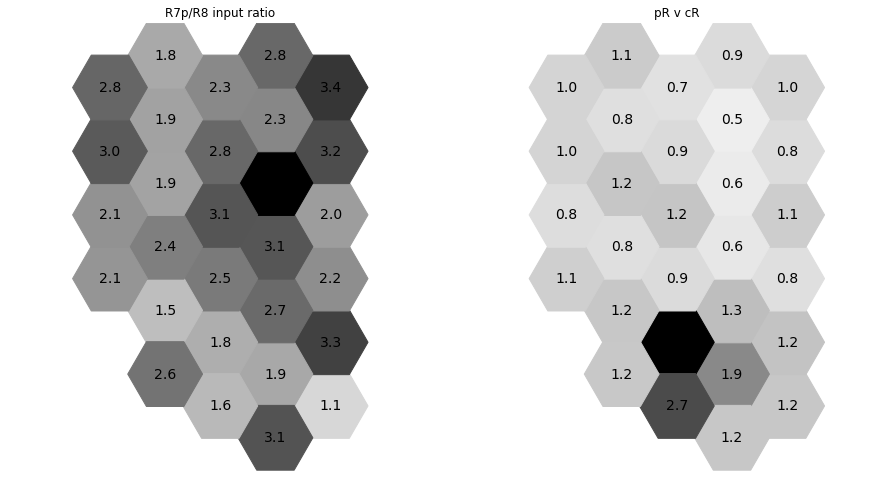

In [9]:
fig, ax = plt.subplots(1, 2, figsize=[15, 30])

r7pr8_ratio = df_lamina.filter(regex='->R7p$').sum(axis=1).astype(float) / df_lamina.filter(regex='->R8$').sum(axis=1).astype(float)
l3_input_ratio = (df_lamina['R1R4->LMC_3'].astype(float) +  df_lamina['R3R6->LMC_3'].astype(float)) / df_lamina['R2R5->LMC_3'].astype(float)

node_data = {k: {'colour': ucm(v, r7pr8_ratio.max(), 'Greys'),
                'label': str(round(v, 1))} for k, v in r7pr8_ratio.items()}
hexplot(node_data=node_data, ax=ax[0])
ax[0].set_title("R7p/R8 input ratio")

node_data = {k: {'colour': ucm(v, l3_input_ratio.max(), 'Greys'),
                'label': str(round(v, 1))} for k, v in l3_input_ratio.items()}
hexplot(node_data=node_data, ax=ax[1])
ax[1].set_title("pR v cR")

In [10]:
rb = pd.read_csv('~/Data/lamina_additional_data/ret_cell_vol.csv').set_index('rtype').T
rb = rb.loc[sorted(rb.index)]
display(rb)
#rb_long = rhab_vols.melt(id_vars='r', value_vars=[c for c in rhab_vols.columns if c[-1] == 'r'], value_name='rb_vol').T

rtype,R1,R2,R3,R7p,R4,R5,R6,R7,R8
A0,2.323403,6.086770,3.591944,10.366335,2.978513,5.694905,3.416281,8.727351,6.358027
A1,5.310454,5.827721,4.555230,15.234699,3.309932,7.269855,4.197519,4.226182,7.634705
A2,5.092674,7.702657,3.022038,13.117198,4.400592,5.649107,4.121674,7.185002,5.454782
A3,2.127362,6.467287,2.749297,8.222411,3.041466,5.522935,3.138865,8.222687,5.430847
A4,3.012936,4.381942,2.714277,5.709287,2.104243,4.422182,3.443799,5.860794,1.063402
A5,1.734687,3.059036,2.184217,3.471102,1.648559,3.158748,1.947013,2.927452,0.650500
B0,5.893691,2.521376,2.207250,16.772216,7.612607,6.507585,4.038800,4.478997,8.823803
B1,6.280229,5.005597,4.895804,21.674195,5.241742,7.359406,4.114076,3.220619,10.050852
B2,4.267148,7.337889,4.516064,16.287313,4.279896,6.312359,4.489593,4.478565,8.157599
B3,4.629305,6.692980,2.343083,11.534464,2.963927,5.834653,2.773630,6.744872,7.138981


Text(0.5,1,'R7p Vol')

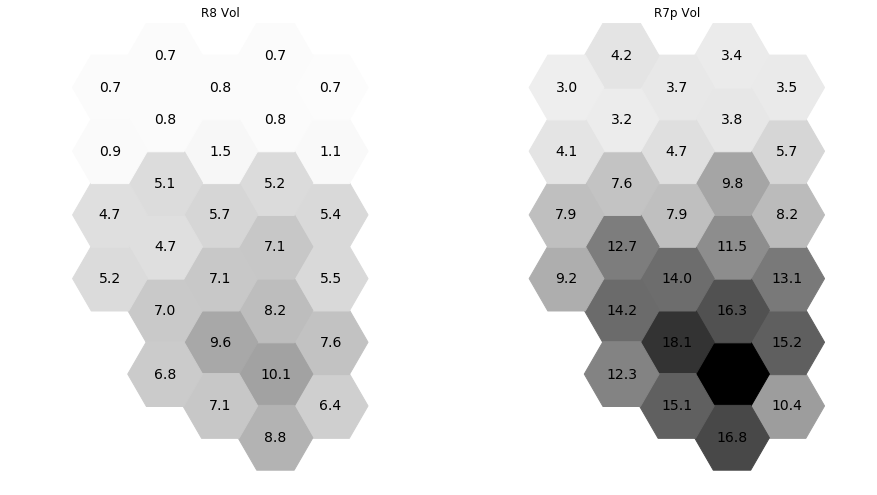

In [11]:
fig, ax = plt.subplots(1, 2, figsize=[15, 30])

node_data = {k: {'colour': ucm(v, rb['R7p'].max(), 'Greys'),
                'label': str(round(v, 1))} for k, v in rb['R8'].items()}
hexplot(node_data=node_data, ax=ax[0])
ax[0].set_title("R8 Vol")

node_data = {k: {'colour': ucm(v, rb['R7p'].max(), 'Greys'),
                'label': str(round(v, 1))} for k, v in rb['R7p'].items()}
hexplot(node_data=node_data, ax=ax[1])
ax[1].set_title("R7p Vol")

In [12]:
def lin_model_intercept0(x, y):
    x = np.asarray(x).reshape(-1, 1)
    y = np.asarray(y)
    return LinearRegression(fit_intercept=0).fit(x, y)

def plot_lin_fit(x, y, ax, plot_kwargs={}, scatter_kwargs={}):
    xpoints = np.arange(0, x.max()).reshape(-1, 1)
    model = lin_model_intercept0(x, y)
    fitprops = f"R^2: {model.score(x.to_numpy().reshape(-1, 1), y): .2f}, coef: {model.coef_[0]: .2f}"

    ax.plot(xpoints, model.predict(xpoints), label=plot_kwargs.get('label', '') + ' \n' + fitprops, **plot_kwargs)
    ax.scatter(x,y, label=None, **scatter_kwargs)
    ax.legend()

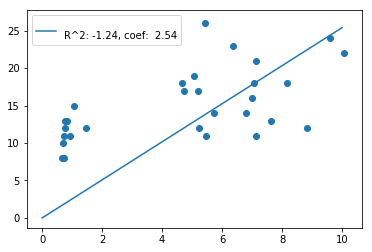

In [13]:
fig, ax = plt.subplots(1)
#sns.regplot(rb.loc[:, "R8"], df_lamina.filter(regex='->R8$').sum(axis=1))
plot_lin_fit(x=rb.loc[:, "R8"], y=df_lamina.filter(regex='centri->R8').sum(axis=1), ax=ax)
# plot_lin_fit(x=rb.loc[:, "R7"], y=df_lamina.filter(regex='centri->R7$').sum(axis=1), ax=ax)
#plot_lin_fit(x=rb.loc[:, "R7p"], y=df_lamina.filter(regex='centri->R7p$').sum(axis=1), ax=ax)
# plt.show()

NameError: name 'ret_clust' is not defined

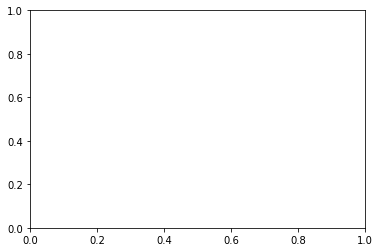

In [14]:
fig, ax = plt.subplots(1)

d = df_lamina.loc[ret_clust=='dorsal']
c = df_lamina.loc[ret_clust=='central']
v = df_lamina.loc[ret_clust=='ventral']
nv = df_lamina.loc[ret_clust!='ventral']
nd = df_lamina.loc[ret_clust!='dorsal']
display(d)

#sns.regplot(d.filter(regex='->R8$').sum(axis=1), d.filter(regex='->R7p$').sum(axis=1), ax=ax)
# sns.regplot(d.filter(regex='->R8$').sum(axis=1), d.filter(regex='->R7p$').sum(axis=1), ax=ax, label='dorsal')
# sns.regplot(c.filter(regex='->R8$').sum(axis=1), c.filter(regex='->R7p$').sum(axis=1), ax=ax, label='central')
sns.regplot(nv.filter(regex='->R8$').sum(axis=1), nv.filter(regex='->R7p$').sum(axis=1), ax=ax, label='non-ventral')
sns.regplot(v.filter(regex='->R8$').sum(axis=1), v.filter(regex='->R7p$').sum(axis=1), ax=ax, label='ventral')
ax.set_xlabel('R8')
ax.set_ylabel('R7p')
ax.legend()

In [ ]:
fig, ax = plt.subplots(1)

sns.regplot(c.filter(regex='centri->R8$').sum(axis=1), c.filter(regex='centri->R7p$').sum(axis=1), ax=ax, label='central')
sns.regplot(v.filter(regex='centri->R8$').sum(axis=1), v.filter(regex='centri->R7p$').sum(axis=1), ax=ax, label='ventral')
sns.regplot(d.filter(regex='centri->R8$').sum(axis=1), d.filter(regex='centri->R7p$').sum(axis=1), ax=ax, label='dorsal')
ax.set_xlabel('R8')
ax.set_ylabel('R7p')
ax.legend()